In [8]:
import csv
import os

def add_image_info_to_csv(image_path, class_name="Test", key_terms="Test"):
    csv_file_name = 'Image_Keyterms.csv'
    file_exists = os.path.isfile(csv_file_name)
    with open(csv_file_name, mode='a', newline='', encoding='utf-8') as file:
        writer = csv.writer(file)
        if not file_exists:
            writer.writerow(['Path', 'Class', 'Keyterms'])
        writer.writerow([image_path, class_name, key_terms])

image_path = "(1).jpg"
add_image_info_to_csv(image_path)


In [13]:
import csv
import os
import ast

def add_image_info_to_csv(image_path, class_name, key_terms):
    csv_file_name = 'Image_Keyterms.csv'
    file_exists = os.path.isfile(csv_file_name)
    with open(csv_file_name, mode='a', newline='', encoding='utf-8') as file:
        writer = csv.writer(file)
        if not file_exists:
            writer.writerow(['Path', 'Class', 'Keyterms'])
        image_path = "'{}'".format(image_path)
        class_name = "'{}'".format(class_name)
        writer.writerow([image_path, class_name] + [key_terms])

image_path = "(1).jpg"
class_name = "Scenery"
key_terms = ["Sunset", "Beach", "Sea"]
add_image_info_to_csv(image_path, class_name, key_terms)


PAINTING DATA:- 

Training
Average image size: 224.17 x 219.76 (W x H)
Min image size: 75 x 108 (W x H)
Max image size: 450 x 309 (W x H)
Image format distribution: {'PNG': 3, 'JPEG': 1749}
Class distribution: {'Madhubani': 219, 'pattachitra': 219, 'Mural': 219, 'Tanjore': 219, 'Portrait': 219, 'Kangra': 219, 'Warli': 219, 'Kalamkari': 219}


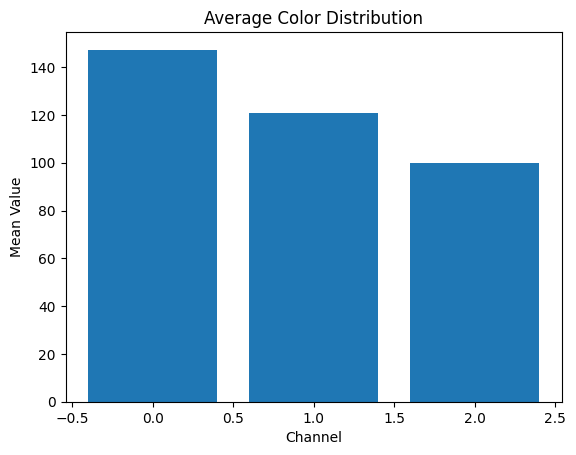

Average Texture (Laplacian Variance): 8947.167345101361
Average Shape (Contour Area): 28743.277397260274

Testing
Average image size: 226.42 x 217.55 (W x H)
Min image size: 84 x 92 (W x H)
Max image size: 438 x 318 (W x H)
Image format distribution: {'PNG': 2, 'JPEG': 742}
Class distribution: {'Madhubani': 93, 'pattachitra': 93, 'Mural': 93, 'Tanjore': 93, 'Portrait': 93, 'Kangra': 93, 'Warli': 93, 'Kalamkari': 93}


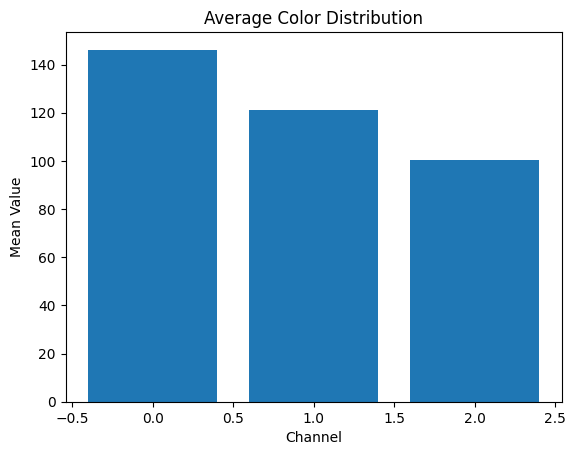

Average Texture (Laplacian Variance): 9228.801817826885
Average Shape (Contour Area): 28309.82123655914




In [21]:
from PIL import Image
import os
import matplotlib.pyplot as plt
import numpy as np
import cv2

def analyze_image_sizes_and_formats(image_directory):
    image_sizes = []
    image_formats = []
    
    for root, dirs, files in os.walk(image_directory):
        for file in files:
            if file.lower().endswith(('.png', '.jpg', '.jpeg', '.tiff', '.bmp', '.gif')):
                try:
                    with Image.open(os.path.join(root, file)) as img:
                        image_sizes.append(img.size)  
                        image_formats.append(img.format)
                except Exception as e:
                    print(f"Error opening {file}: {e}")

    widths, heights = zip(*image_sizes)
    avg_width = np.mean(widths)
    avg_height = np.mean(heights)
    print(f"Average image size: {avg_width:.2f} x {avg_height:.2f} (W x H)")
    print(f"Min image size: {min(widths)} x {min(heights)} (W x H)")
    print(f"Max image size: {max(widths)} x {max(heights)} (W x H)")
    format_distribution = {format: image_formats.count(format) for format in set(image_formats)}
    print(f"Image format distribution: {format_distribution}")

def analyze_class_distribution(image_directory):
    classes = [d for d in os.listdir(image_directory) if os.path.isdir(os.path.join(image_directory, d))]
    class_counts = {class_name: len(os.listdir(os.path.join(image_directory, class_name))) for class_name in classes}
    print(f"Class distribution: {class_counts}")
    

def analyze_color_distribution(image_directory):
    total_color_distribution = np.zeros(3)  
    
    total_images = 0
    
    for root, dirs, files in os.walk(image_directory):
        for file in files:
            if file.lower().endswith(('.png', '.jpg', '.jpeg', '.tiff', '.bmp', '.gif')):
                with Image.open(os.path.join(root, file)) as img:
                    img_data = np.array(img)
                    color_distribution = np.mean(img_data, axis=(0, 1))
                    total_color_distribution += color_distribution
                    total_images += 1
    avg_color_distribution = total_color_distribution / total_images
    plt.bar(range(len(avg_color_distribution)), avg_color_distribution)
    plt.title('Average Color Distribution')
    plt.xlabel('Channel')
    plt.ylabel('Mean Value')
    plt.show()
    
def analyze_texture(image_directory):
    total_laplacian_var = 0
    total_images = 0
    
    for root, dirs, files in os.walk(image_directory):
        for file in files:
            if file.lower().endswith(('.png', '.jpg', '.jpeg', '.tiff', '.bmp', '.gif')):
                image_path = os.path.join(root, file)
                img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
                laplacian_var = cv2.Laplacian(img, cv2.CV_64F).var()
                total_laplacian_var += laplacian_var
                total_images += 1
    
    avg_laplacian_var = total_laplacian_var / total_images
    print("Average Texture (Laplacian Variance):", avg_laplacian_var)

def analyze_shape(image_directory):
    total_area = 0
    total_images = 0
    
    for root, dirs, files in os.walk(image_directory):
        for file in files:
            if file.lower().endswith(('.png', '.jpg', '.jpeg', '.tiff', '.bmp', '.gif')):
                image_path = os.path.join(root, file)
                img = cv2.imread(image_path)
                gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
                _, thresh = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)
                contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
                for cnt in contours:
                    area = cv2.contourArea(cnt)
                    total_area += area
                
                total_images += 1
    
    avg_area = total_area / total_images
    print("Average Shape (Contour Area):", avg_area)


painting_train_directory = '../Data/Image/Indian Paintings DataSet/training'
painting_test_directory = '../Data/Image/Indian Paintings DataSet/testing'
print("PAINTING DATA:- ")
print()
print("Training")
analyze_image_sizes_and_formats(painting_train_directory)
analyze_class_distribution(painting_train_directory)
analyze_color_distribution(painting_train_directory)
analyze_texture(painting_train_directory)
analyze_shape(painting_train_directory)
print()
print("Testing")
analyze_image_sizes_and_formats(painting_test_directory)
analyze_class_distribution(painting_test_directory)
analyze_color_distribution(painting_test_directory)
analyze_texture(painting_test_directory)
analyze_shape(painting_test_directory)
print()
print()